In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler 
import random as rd


In [374]:
class single_neutron_NN():
    def __init__(self, data, parameters, pattern_classes):
        self.x = np.insert(data, 0, np.ones(data.shape[0]), axis=1) # add an extra column of 1's to account for bias = w0 
        self.w = parameters # note that dim(w)[1] = dim(data)[1] + 1 =  dim(x)[1] due to the bias 
        self.y = pattern_classes
        self.n_samples = self.x.shape[0]
        self.w_change = []
        self.mse_change = []
        self.learning_rate = 0.01

    def activation_function(self, input):
        return 1/(1+np.exp(-input))
    
    def forward_propagation(self):
        y_hat = self.activation_function(np.dot(self.x,np.transpose(self.w)))
        return y_hat
    
    def back_propagation(self):
        y_hat = self.forward_propagation()
        loss = np.square((self.y - y_hat))
        update = (-2)*np.dot(np.transpose((self.y-y_hat)*y_hat*(1-y_hat)),self.x)
        return update
    
    def calculate_mse(self): #method to calculate mse after forward_propagation with the current weigh-setting
        y_hat = self.forward_propagation()
        mse = np.sum(np.square(self.y-y_hat))*1/self.n_samples
        return mse
    
    def update_weight(self):
        self.w = self.w - self.learning_rate*self.back_propagation()
        self.w_change.append(self.w)
        self.mse_change.append(self.calculate_mse())
    
    def converged(self):
        gradient = self.back_propagation()
        new_w = self.w - self.learning_rate*gradient
        return np.array_equiv(self.w, new_w)
    
    def train(self):
        i = 0
        while (i <= 10):
            self.update_weight()
            i = i+1
        return self.w_change
        

In [375]:
#    data: data of vectors, including rows that require classification into 0 / 1 type based on a set of features
#   parameters: set of weights that define the neural network
#    pattern_classes: 0/1 classification array that classifies data in type 0 or type 1
def compute_mean_squared(data, parameters, pattern_classes):
    nn = single_neutron_NN(data, parameters, pattern_classes)
    res = nn.calculate_mse()
    return res

In [398]:
#   TEST compute_mean_squared with param = all zeros array

iris = pd.read_csv(".\data\IRIS.csv")

#   Get rows of which species is 'Iris-versicolor' or 'Iris-virginica', columns of features 2 and 3
data = iris[iris['species'].isin(["Iris-versicolor", "Iris-virginica"])].iloc[:, 2:4].values 

#   Get rows of which species is 'Iris-versicolor' or 'Iris-virginica', column species 
label_column = iris[iris['species'].isin(["Iris-versicolor", "Iris-virginica"])].iloc[:, [4]].values

#   Classifying type: Iris-versicolor = 1, Iris-virginica = 0
pattern_classes = np.where(label_column == 'Iris-versicolor', 1, 0)

#   Initialize weights
param = np.zeros((1,data.shape[1]+1))

print(compute_mean_squared(data, param, pattern_classes))



0.25


C:\Users\lemin\AppData\Local\Temp\ipykernel_28220\4187673586.py:32: RuntimeWarning: invalid value encountered in double_scalars
  centroids_1 = np.sum(cluster_1)*1/cluster_1.shape[0]


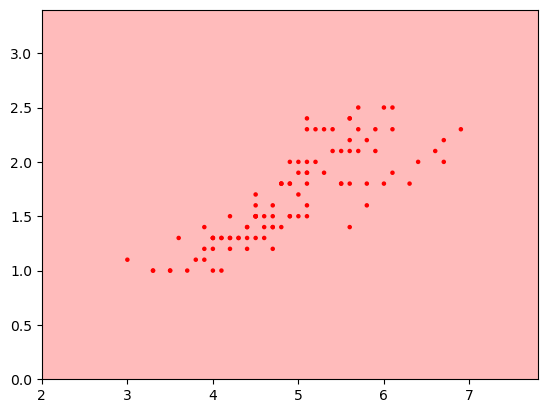

In [399]:
from matplotlib.colors import ListedColormap

# Weight-setting 1: w = all zeros array

w0 = np.zeros((1,data.shape[1]+1))

nn_0 = single_neutron_NN(data, w0, pattern_classes)

mse_0 = compute_mean_squared(data, w0, pattern_classes)

y_hat = nn_0.forward_propagation()


def calculate_centroids():
    cluster_0 = []
    cluster_1 = []

    classifier = []

    for i in range(y_hat.shape[0]):
        if (y_hat[i] > 1/2):
            cluster_1.append(data[i])
            classifier.append(1)
        else:
            cluster_0.append(data[i])
            classifier.append(0)

    cluster_0 = np.array(cluster_0)
    cluster_1 = np.array(cluster_1)

    centroids_0 = np.sum(cluster_0)*1/cluster_0.shape[0]
    centroids_1 = np.sum(cluster_1)*1/cluster_1.shape[0]

    return [np.array([centroids_0, centroids_1]), np.array(classifier)]


def plot_decision_boundaries(): #feature_x, feature_y are integer positions of the column corresponding to the features that needs to be plotted 
    centroids = calculate_centroids()[0]
    classifier = calculate_centroids()[1]

    # Plot the clusters
    x_min, x_max = data[:, 0].min()-1, data[:, 0].max()+1
    y_min, y_max = data[:, 1].min()-1, data[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    assign_grid = np.zeros(xx.shape)
    
    for x in range(assign_grid.shape[0]):
        for y in range(assign_grid.shape[1]):
            assign_grid[x][y] = -1
            min_dist = float('inf') 
            for k in range(centroids.shape[0]):
                centroid = centroids[k]
                distance_to_k = np.sum(np.square(np.subtract(np.array([xx[x][y], yy[x][y]]), centroid)))
                if distance_to_k < min_dist:
                        min_dist = distance_to_k
                        assign_grid[x][y] = k

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    pcmap = ListedColormap(['red', 'green', 'blue'])

    plt.contourf(xx, yy, assign_grid, cmap=cmap, alpha=.8)
    plt.scatter(data[:, 0], data[:, 1], c = classifier, cmap=pcmap, s = 5)
    plt.show()

plot_decision_boundaries()






39.06715078843148
[ 0.         -0.36455712 -0.10955908]
[0.13391229 0.14126223 0.12448048 0.16789005 0.13689745 0.14394124
 0.13139128 0.2120525  0.13950714 0.17148268 0.20012569 0.15505672
 0.17253202 0.13391229 0.18925896 0.147112   0.14126223 0.16738939
 0.14126223 0.17620295 0.12487205 0.16789005 0.12448048 0.13647406
 0.15316081 0.147112   0.1297403  0.11825746 0.14126223 0.20012569
 0.1815573  0.18870904 0.17461828 0.1156243  0.14126223 0.13993841
 0.13264671 0.14849196 0.16285855 0.16789005 0.14988259 0.13819712
 0.1694262  0.2120525  0.15794922 0.15941184 0.15794922 0.15316081
 0.22896116 0.16285855 0.07862043 0.11230562 0.08463608 0.09632636
 0.08663266 0.06684773 0.138625   0.07628578 0.09016371 0.07601985
 0.11121803 0.10523972 0.09663914 0.11487302 0.10695936 0.10118392
 0.09954678 0.06395028 0.05910978 0.12056144 0.08867178 0.1186321
 0.06527454 0.12094238 0.09045848 0.08435852 0.12487205 0.12094238
 0.09350302 0.09197745 0.08076778 0.07227321 0.09257852 0.11674932
 0.1002

C:\Users\lemin\AppData\Local\Temp\ipykernel_28220\1633124933.py:34: RuntimeWarning: invalid value encountered in double_scalars
  centroids_1 = np.sum(cluster_1)*1/cluster_1.shape[0]


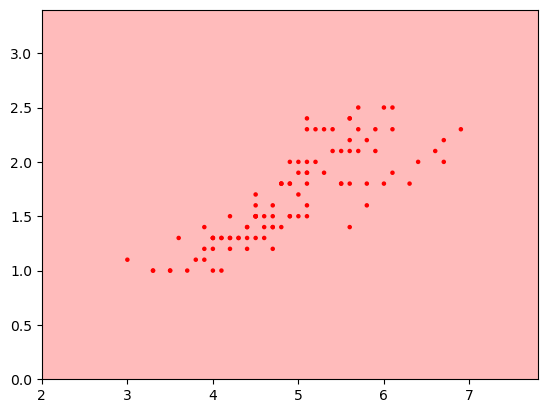

In [472]:
# Weight-setting 0: w = randomize between -1 - 1
w1 = []
for i in range(data.shape[1]+1):
    w1.append(rd.uniform(-1,1))
w1 = np.array(w1)
nn_1 = single_neutron_NN(data, w1, pattern_classes)
mse_1 = compute_mean_squared(data, w1, pattern_classes)
print(mse_1)
print(w1)

y_hat = nn_1.forward_propagation()

print(y_hat)

def calculate_centroids():
    cluster_0 = []
    cluster_1 = []

    classifier = []

    for i in range(y_hat.shape[0]):
        if (y_hat[i] > 1/2):
            cluster_1.append(data[i])
            classifier.append(1)
        else:
            cluster_0.append(data[i])
            classifier.append(0)

    cluster_0 = np.array(cluster_0)
    cluster_1 = np.array(cluster_1)

    centroids_0 = np.sum(cluster_0)*1/cluster_0.shape[0]
    centroids_1 = np.sum(cluster_1)*1/cluster_1.shape[0]

    return [np.array([centroids_0, centroids_1]), np.array(classifier)]


def plot_decision_boundaries(): #feature_x, feature_y are integer positions of the column corresponding to the features that needs to be plotted 
    centroids = calculate_centroids()[0]
    classifier = calculate_centroids()[1]

    # Plot the clusters
    x_min, x_max = data[:, 0].min()-1, data[:, 0].max()+1
    y_min, y_max = data[:, 1].min()-1, data[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    assign_grid = np.zeros(xx.shape)
    
    for x in range(assign_grid.shape[0]):
        for y in range(assign_grid.shape[1]):
            assign_grid[x][y] = -1
            min_dist = float('inf') 
            for k in range(centroids.shape[0]):
                centroid = centroids[k]
                distance_to_k = np.sum(np.square(np.subtract(np.array([xx[x][y], yy[x][y]]), centroid)))
                if distance_to_k < min_dist:
                        min_dist = distance_to_k
                        assign_grid[x][y] = k

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    pcmap = ListedColormap(['red', 'green', 'blue'])

    print(assign_grid)
    plt.contourf(xx, yy, assign_grid, cmap=cmap, alpha=.8)
    plt.scatter(data[:, 0], data[:, 1], c = classifier, cmap=pcmap, s = 5)
    plt.show()

plot_decision_boundaries()

